In [2]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()

  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
    self.no_of_hidden_nodes))

  def train(self, input_vector, target_vector):
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    target_vector = np.array(target_vector).reshape(target_vector.size, 1)
    output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
    output_error = target_vector - output_vector_network
    tmp = output_error * output_vector_network * (1.0 - output_vector_network)
    self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
    hidden_errors = self.weights_hidden_out.T @ output_error
    tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
    self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)

  def run(self, input_vector):
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    input4hidden = activation_function(self.weights_in_hidden@ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
    return output_vector_network

  def evaluate(self, data, labels):
    corrects, wrongs = 0, 0
    for i in range(len(data)):
      res = self.run(data[i])
      res_max = res.argmax()
      if res_max == labels[i].argmax():
        corrects += 1
      else:
        wrongs += 1
    return corrects, wrongs




In [3]:
from sklearn.datasets import make_blobs
n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples,
centers=blob_centers,
random_state=7)

array([2, 2, 1, 0, 2, 0, 1])

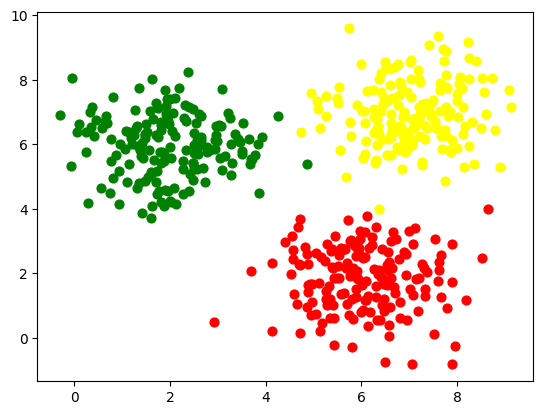

In [5]:
import matplotlib.pyplot as plt
colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()
for n_class in range(n_classes):
  ax.scatter(data[labels==n_class][:, 0],
  data[labels==n_class][:, 1],
  c=colours[n_class],
  s=40,
  label=str(n_class))

labels[:7]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(float)
labels[:7]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])